### Python String

In [1]:
a = "Data"
print(a)

Data


### String are arrays

In [2]:
a = "Dataset"
print(a[4])

s


### Slicing

In [3]:
# To get the output from position 3 to 6(not included)
a = "Data test"
print(a[3:6])

# To get the output by negative indexing from -6 position to -2 position
print(a[-6:-2])

# Get the result from position 2 to 6 but you give result with increment of 2
print(a[2:6:2])

a t
a te
t 


### String Method

In [4]:
print("Split Method: ", a.split())
print("Lower Method: ", a.lower())
print("Upper Method: ", a.upper())
print("Replace Method: ", a.replace('e', '_'))

Split Method:  ['Data', 'test']
Lower Method:  data test
Upper Method:  DATA TEST
Replace Method:  Data t_st


### String Concatination

In [5]:
a = "Data test"
b = " train"
print(a+b)

Data test train


### Create a text file

In [6]:
# Step 1
file = open("dataset.txt", "w+")

# Step 2
for i in range(5):
    file.write("Line number is: %d\r\n"%(i+1))
    
# Step 3
file.close()

### Append data to a file

In [7]:
# Step 1
file = open("dataset.txt", "a+")

# Step 2
for i in range(3):
    file.write("Appending line number: %d\r\n"%(i+1))

# Step 3
file.close()

### Read the file 

In [8]:
# Step 1
file = open("dataset.txt", "r")

# Step 2
if file.mode == 'r':
    content = file.read()
    
# Step 3
print(content)

Line number is: 1
Line number is: 2
Line number is: 3
Line number is: 4
Line number is: 5
Appending line number: 1
Appending line number: 2
Appending line number: 3



## Text PreProcessing

In [9]:
import nltk
import string
import re

### Text lower case

In [10]:
def lowercase_text(text):
    return text.lower()

input_str = "Weather is too Cloudy possibility of Rain is High."
lowercase_text(input_str)

'weather is too cloudy possibility of rain is high.'

### Regex Expression 

In [11]:
# Remove Numbers
def remove_num(text):
    result = re.sub('\d+', " ", text)
    return result
    
input_str = "You bought 6 candies from shop and 4 candies are in home."
remove_num(input_str)

'You bought   candies from shop and   candies are in home.'

### inflect

In [12]:
import inflect

# Initialize the inflect engine
p = inflect.engine()

# Convert number into text
def convert_num(text):
    # Split strings into list of texts
    temp_string = text.split()

    # Initialize empty list
    new_str = []

    for word in temp_string:
        # If text is a digit, convert the digit to words and append into the new str list
        if word.isdigit():
            new_str.append(p.number_to_words(word))
        # Append the texts as it is
        else:
            new_str.append(word)

    # Join the texts of new str to form a string
    temp_str = ' '.join(new_str)

    return temp_str

input_str = 'You bought 6 candies from shop, and 4 candies are in home.'
print(convert_num(input_str))

You bought six candies from shop, and four candies are in home.


### Remove punctuation

In [13]:
def remove_punct(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

input_str = "Hey, Are you excited?, After a week, we will be in Shimla!!!"
remove_punct(input_str)

'Hey Are you excited After a week we will be in Shimla'

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Remove Stopwords 

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Remove Stopwords 
def rem_stopwords(text):
    stop_words = set(stopwords.words('English'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word not in stop_words]
    return filtered_text

ex_text = "Data is the new oil. A.I is the last invention."
rem_stopwords(ex_text)

['Data', 'new', 'oil', 'A.I', 'last', 'invention']

### Stemming

In [16]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
#stem words in the list of tokenised words
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

text = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
stem_words(text)

['data',
 'is',
 'the',
 'new',
 'revolut',
 'in',
 'the',
 'world',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individu',
 'would',
 'gener',
 'terabyt',
 'of',
 'data',
 '.']

### Lemmatization

In [17]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

def lemmatize_word(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Lemmatize each word
    lemmas = [wordnet.WordNetLemmatizer().lemmatize(word, pos='v') for word in word_tokens]
    return lemmas

text = "Data is the new revolution in the World, in a day one individual would generate terabytes of data."
lemmatized_words = lemmatize_word(text)
print(lemmatized_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bhushannimje/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Data', 'be', 'the', 'new', 'revolution', 'in', 'the', 'World', ',', 'in', 'a', 'day', 'one', 'individual', 'would', 'generate', 'terabytes', 'of', 'data', '.']


### Parts of Speech (POS) Tagging

In [18]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# convert text into word tokens with their tags
def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tagg("Are you afraid of something?")

[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

### Chunking

In [19]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# here we define chunking function with text and regular
# expressions representing grammar as parameter
def chunking(text, grammar):
    word_tokens = word_tokenize(text)
    
    # label words with pos
    word_pos = pos_tag(word_tokens)
    
    # create chunk parser using grammar
    chunkParser = nltk.RegexpParser(grammar)
    
    # test it on the list of word tokens with tagged pos
    tree = chunkParser.parse(word_pos)
    
    # iterate over the parse tree and print subtrees
    for subtree in tree.subtrees():
        print(subtree)
        
# sentence to be chunked
sentence = 'the little red parrot is flying in the sky'

# Regular expression grammar for Noun Phrase (NP)
grammar = "NP: {<DT>?<JJ>*<NN>}"

chunking(sentence, grammar)

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


### Named Entity Recognition

In [20]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk

def ner(text):
    word_tokens = word_tokenize(text)
    
    #pos tagging of words
    word_pos = pos_tag(word_tokens)
    
    #tree of word entities
    print(ne_chunk(word_pos))
    
text = 'Brain Lara scored the highest 400 runs in a test match which played in between WI and England.'
ner(text)

(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  (ORGANIZATION WI/NNP)
  and/CC
  (GPE England/NNP)
  ./.)


### Regex

In [21]:
import re

text = "dataset, Data is a new fuel"
r2 = re.findall(r"^\w+", text)
print(r2)

['dataset']


### re.split function

In [22]:
text = "dataset, Data is a new fuel"
r2 = re.findall(r"\w+", text)
print(r2)

['dataset', 'Data', 'is', 'a', 'new', 'fuel']


In [23]:
r2 = re.split(r"\s", text)
print(r2)

['dataset,', 'Data', 'is', 'a', 'new', 'fuel']


## RegEx methods

### re.match()

In [24]:
lists = ['icecream images', 'i immitated', 'inner peace']

for i in lists:
    a = re.match("(i\w+)\W(i\w+)", i)
    
    if a:
        print(a.groups())

('icecream', 'images')


### Finding Pattern in the text(re.search())

In [25]:
pattern = ["playing", "dataset"]
text = "Raju is playing outside."

for p in pattern:
    print("You are looking for '%s' in '%s'" % (p, text), end='')
    
    if re.search(p, text):
        print("Found match")
    else:
        print("No match found")

You are looking for 'playing' in 'Raju is playing outside.'Found match
You are looking for 'dataset' in 'Raju is playing outside.'No match found


### Using re.findall() for text

In [26]:
email = "Abc@gmail.com, XYX@gmail.com, lmn@gmail.com, efg@gmail.com"

find_email = re.findall(r' [\w\.]+@[\w\.]+', email)
for i in find_email:
    print(i)

 XYX@gmail.com
 lmn@gmail.com
 efg@gmail.com


### Text Normalization

### TOKENIZERS

In [27]:
from nltk.tokenize.regexp import WhitespaceTokenizer

In [28]:
n="'There is no need to panic. We need to work together, take small yet important measures to ensure self-protect:'"

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
text="Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars. In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."

In [31]:
word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planet',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 "'s",
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

In [32]:
tokens = WhitespaceTokenizer().tokenize(n)

In [33]:
print(len(tokens))

19


In [34]:
tokens

["'There",
 'is',
 'no',
 'need',
 'to',
 'panic.',
 'We',
 'need',
 'to',
 'work',
 'together,',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 "self-protect:'"]

#### Now we are going to perform the same operation but with different tokenizer

In [35]:
my_str="There is no need to panic. We need to work together."

In [36]:
from nltk.tokenize.regexp import WordPunctTokenizer

In [37]:
# Above tokenizer also split the words into tokens:

In [38]:
wpt = WordPunctTokenizer().tokenize(my_str)

In [39]:
wpt

['There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'work',
 'together',
 '.']

In [40]:
from nltk.tokenize import sent_tokenize

text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a multi-planetary species by building a self-sustaining city on Mars. In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""
sent_tokenize(text)

["Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a multi-planetary species by building a self-sustaining city on Mars.",
 "In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."]

### Frequency Distribution

In [41]:
import nltk

text1= "There is no need to panic. We need to work together, take small yet important measures to ensure "
freqDist = nltk.FreqDist(word_tokenize(text1))
print(freqDist)

<FreqDist with 17 samples and 20 outcomes>


In [42]:
print(freqDist["person"])

0


In [43]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


In [44]:
words

dict_keys(['There', 'is', 'no', 'need', 'to', 'panic', '.', 'We', 'work', 'together', ',', 'take', 'small', 'yet', 'important', 'measures', 'ensure'])

In [45]:
print(len(words))

17


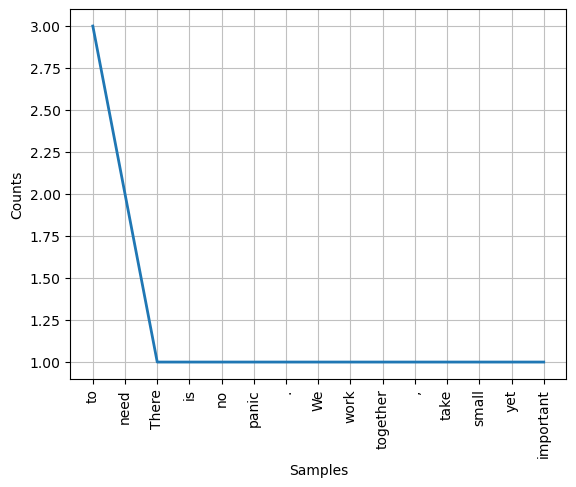

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [46]:
freqDist.plot(15)

### Personal Frequency Distribution

In [47]:
from nltk import FreqDist

In [48]:
sent = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection."
text_list = sent.split(" ")
freqDist = FreqDist(text_list)
words = list(freqDist.keys())

print(freqDist['need'])

2


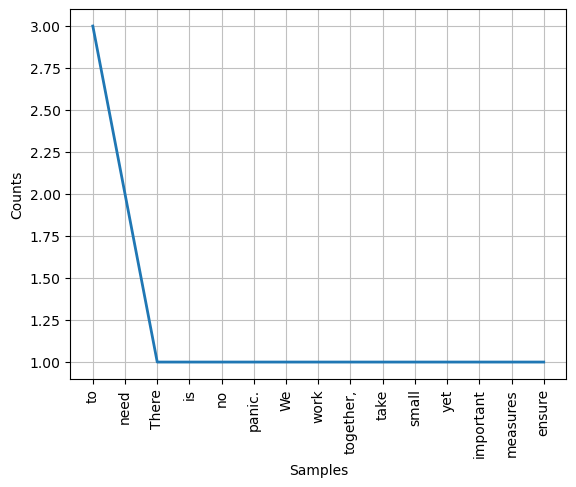

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [49]:
freqDist.plot(15)